### EE399 HW2
### Xinqi Chen
### April 15, 2023

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

#### part a

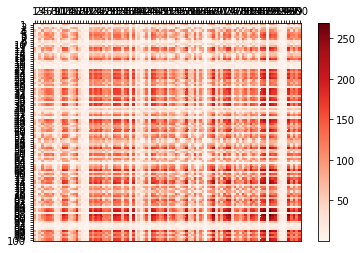

In [3]:
results = loadmat('yalefaces.mat')
X = results['X']

# Compute the correlation matrix for the first 100 images
C = X[:, :100].T @ X[:, :100]

# Plot the correlation matrix using pcolor
fig, ax = plt.subplots()
heatmap = ax.pcolor(C, cmap=plt.cm.Reds)
ax.set_xticks(np.arange(C.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(C.shape[1]) + 0.5, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_xticklabels(np.arange(1, C.shape[0]+1), minor=False)
ax.set_yticklabels(np.arange(1, C.shape[1]+1), minor=False)
plt.colorbar(heatmap)
plt.show()

#### part b

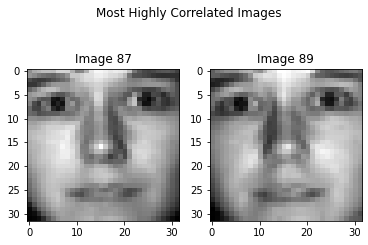

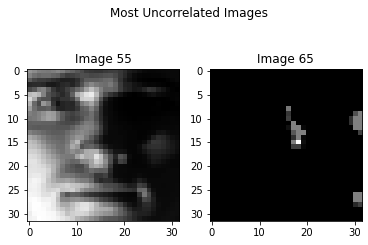

In [4]:
i, j = np.unravel_index(np.argmax(C - np.eye(C.shape[0])*np.max(C)), C.shape)
k, l = np.unravel_index(np.argmin(C + np.eye(C.shape[0])*np.max(C)), C.shape)

# Plot the most highly correlated images
fig, axs = plt.subplots(1, 2)
axs[0].imshow(X[:, i].reshape(32, 32), cmap='gray')
axs[0].set_title(f"Image {i+1}")
axs[1].imshow(X[:, j].reshape(32, 32), cmap='gray')
axs[1].set_title(f"Image {j+1}")
plt.suptitle("Most Highly Correlated Images")

# Plot the most uncorrelated images
fig, axs = plt.subplots(1, 2)
axs[0].imshow(X[:, k].reshape(32, 32), cmap='gray')
axs[0].set_title(f"Image {k+1}")
axs[1].imshow(X[:, l].reshape(32, 32), cmap='gray')
axs[1].set_title(f"Image {l+1}")
plt.suptitle("Most Uncorrelated Images")

plt.show()

#### part c

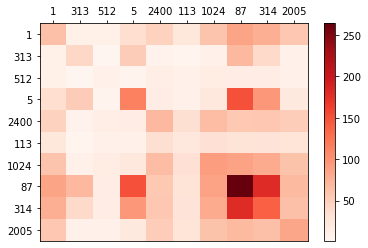

In [6]:
# Select the specified images
image_indices = [0, 312, 511, 4, 2399, 112, 1023, 86, 313, 2004]
X_select = X[:, image_indices]

# Compute the correlation matrix
C_select = X_select.T @ X_select

# Plot the correlation matrix using pcolor
fig, ax = plt.subplots()
heatmap = ax.pcolor(C_select, cmap=plt.cm.Reds)
ax.set_xticks(np.arange(C_select.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(C_select.shape[1]) + 0.5, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_xticklabels(np.array(image_indices)+1, minor=False)
ax.set_yticklabels(np.array(image_indices)+1, minor=False)
plt.colorbar(heatmap)
plt.show()

#### part d

In [18]:
# Create the matrix Y
Y = X.T @ X

# Compute the first six eigenvectors with the largest magnitude eigenvalue
eigvals, eigvecs = np.linalg.eig(Y)
idx = np.argsort(eigvals)[::-1]
eigvecs = eigvecs[:, idx[:6]]
print("The first six eigenvectors with the largest magnitude are:", largest_eigvecs)

The first six eigenvectors with the largest magnitude are: [[ 0.02384327  0.04535378  0.05653196  0.04441826 -0.03378603  0.02207542]
 [ 0.02576146  0.04567536  0.04709124  0.05057969 -0.01791442  0.03378819]
 [ 0.02728448  0.04474528  0.0362807   0.05522219 -0.00462854  0.04487476]
 ...
 [ 0.02082937 -0.03737158  0.06455006 -0.01006919  0.06172201  0.03025485]
 [ 0.0193902  -0.03557383  0.06196898 -0.00355905  0.05796353  0.02850199]
 [ 0.0166019  -0.02965746  0.05241684  0.00040934  0.05757412  0.00941028]]


#### part e

In [19]:
from scipy.linalg import svd

# Perform SVD on X
U, S, Vt = np.linalg.svd(X)

# Find the first six principal component directions
PCs = Vt[:6, :]
print("The first principal component directions are:", PCs)

The first principal component directions are: [[-0.01219331 -0.00215188 -0.01056679 ... -0.02177117 -0.03015309
  -0.0257889 ]
 [-0.01938848 -0.00195186  0.02471869 ...  0.04027773  0.00219562
   0.01553129]
 [ 0.01691206  0.00143586  0.0384465  ...  0.01340245 -0.01883373
   0.00643709]
 [ 0.0204079  -0.01201431  0.00397553 ... -0.01641295 -0.04011563
   0.02679029]
 [-0.01902342  0.00418948  0.0384026  ... -0.01092512  0.00087341
   0.01260435]
 [-0.0090084  -0.00624237  0.01580824 ... -0.00977639  0.00090316
   0.00304479]]


#### part f

In [20]:
v1 = eigvecs[:, 0]
u1 = PCs[0, :]
diff_norm = np.linalg.norm(np.abs(v1) - np.abs(u1))
print("Norm of the difference between v1 and u1:", diff_norm)

Norm of the difference between v1 and u1: 1.419911450662362e-15


#### part g

Percentage of variance captured by each mode:
[0.72927567 0.15281763 0.02566745 0.01877525 0.00639306 0.00592431]


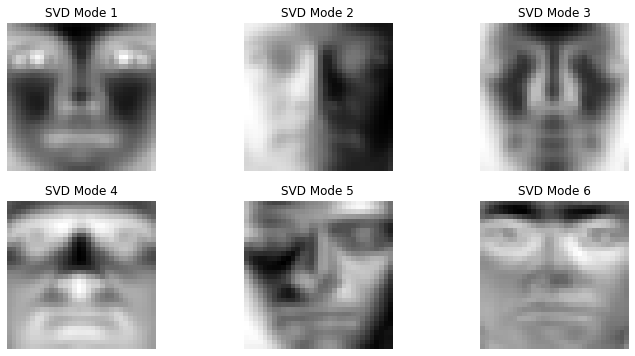

In [4]:
# SVD
U, S, Vt = np.linalg.svd(X, full_matrices=False)

# Percentage of variance captured by each mode
variance = (S ** 2) / (S ** 2).sum()
print("Percentage of variance captured by each mode:")
print(variance[:6])

# Plot the first 6 SVD modes
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(U[:, i].reshape(32, 32), cmap='gray')
    plt.axis('off')
    plt.title(f'SVD Mode {i+1}')

plt.show()